In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
import json
sns.set_theme(style="whitegrid")
plt.style.use('ggplot')



In [14]:
[f for f in os.listdir(base_dir) if f.startswith("run_")]

['run_1']

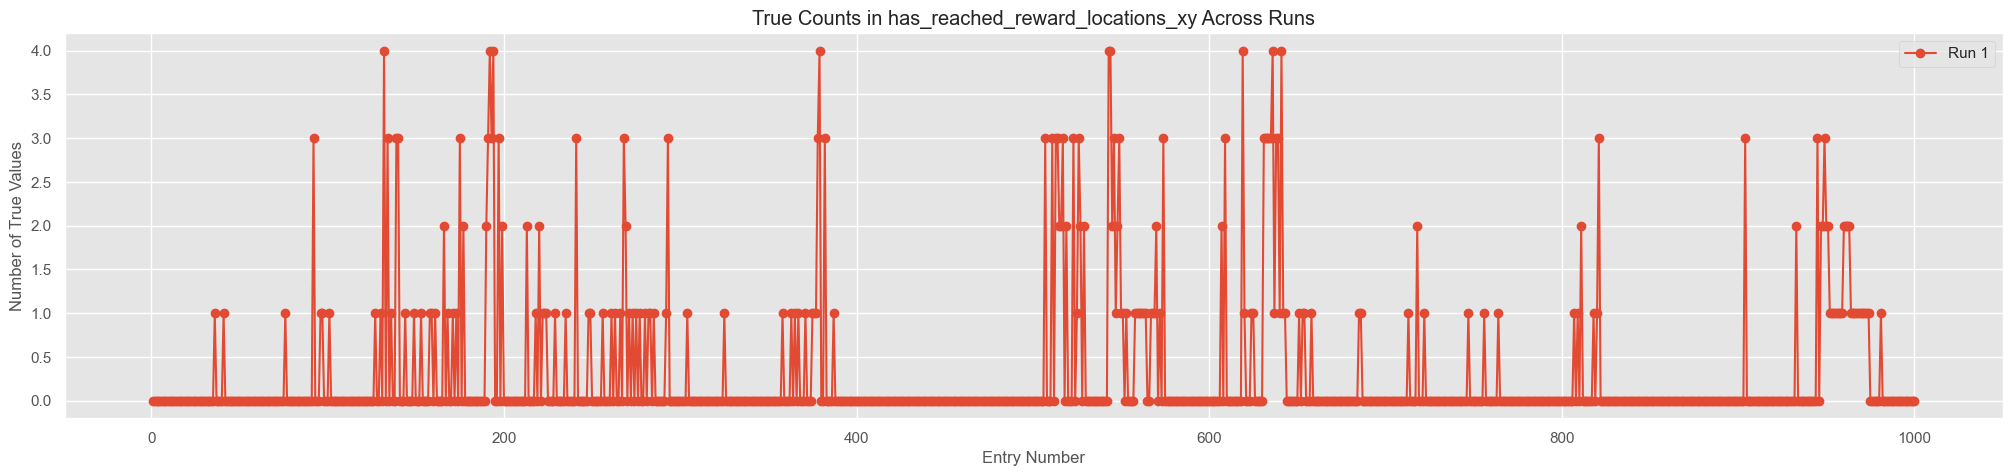

In [15]:
import os
import json
import matplotlib.pyplot as plt

# Base directory where the "run_X" folders are located
base_dir = "../"

# Function to count the number of true values in "has_reached_reward_locations_xy"
def count_trues_in_entry(entry):
    count = 0
    for key, value in entry.items():
        for subkey, subvalue in value.items():
            if subvalue:
                count += 1
    return count

# Initialize a list to hold the counts for all runs
all_runs_counts = []

# Loop over each folder in the base directory
for folder_name in sorted([f for f in os.listdir(base_dir) if f.startswith("run_")], key=lambda x: int(x.split('_')[1])):

    folder_path = os.path.join(base_dir, folder_name, 'logs')
    file_path = os.path.join(folder_path, 'rainbow_env.json')
    
    # Check if the expected file exists
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)
            
            # Initialize a list to hold the true counts for this run
            run_counts = []
            
            # Loop over each entry in the JSON file
            for entry in data.values():
                if "has_reached_reward_locations_xy" in entry:
                    true_count = count_trues_in_entry(entry["has_reached_reward_locations_xy"])
                    run_counts.append(true_count)
            
            # Add the counts for this run to the list of all runs
            all_runs_counts.append(run_counts)

# Plotting
fig, ax = plt.subplots(1, figsize=(25,5), dpi=100)
for i, run_counts in enumerate(all_runs_counts):
    # Assuming X is the index of each count, and Y is the count value
    ax.plot(range(1, len(run_counts) + 1), run_counts, marker='o', label=f'Run {i+1}')

ax.set_xlabel('Entry Number')
ax.set_ylabel('Number of True Values')
ax.set_title('True Counts in has_reached_reward_locations_xy Across Runs')
ax.legend()

plt.show()
